In [1]:
#In this section we will be going over linear regression. 
#We'll be going over how to use the scikit-learn regression model, 
#as well as how to train the regressor using the fit() method, 
#and how to predict new labels using the predict() method. 
#We'll be analyzing a data set consisting of house prices in Boston. 
#We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. 
#We'll do an overview of the mathematics behind the method we're using, 
#but mostly we'll dive deeper into pratical "hands-on" coding lessons.


#In this section we will be working through linear regression with the following steps:

#Step 1: Getting and setting up the data.
#Step 2: Visualizing current data.
#Step 3: The mathematics behind the Least Squares Method.
#Step 4: Using Numpy for a Univariate Linear Regression.
#Step 5: Getting the error.
#Step 6: Using scikit learn to implement a multivariate regression.
#Step 7: Using Training and Validation.  
#Step 8: Predicting Prices
#Step 9 : Residual Plots

In [2]:
#Step 1: Getting and setting up the data.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston

In [4]:
# Load the housing dataset
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Step 2: Visualizing current data

Text(0,0.5,'Number of houses')

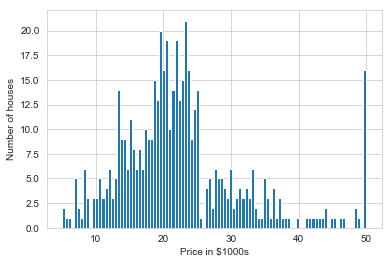

In [8]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=100)

#Label the axes
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

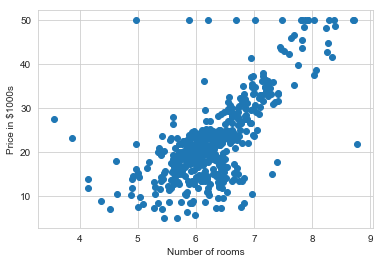

In [9]:
#Scatter plot of one feature (Number of rooms per dwelling), versus the target

# RM is at index 5. Plot the column at the 5 index
plt.scatter(boston.data[:,5],boston.target)

#Label the axes
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [10]:
#Slight trend that price increases along with the number of rooms in that house

In [39]:
#Reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# Label the columns
boston_df.columns = boston.feature_names

#Display the results
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [40]:
# Set price column for target

boston_df['Price'] = boston.target

In [41]:
# Show result
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


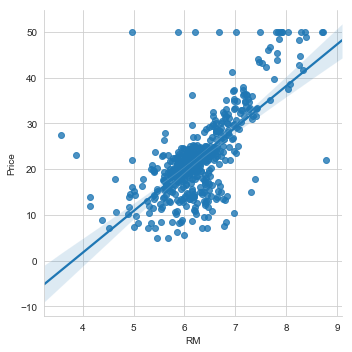

In [42]:
# Using seaborn to create a linear fit

sns.lmplot('RM','Price',data = boston_df)

In [43]:
#Step 3: The mathematics behind the Least Squares Method

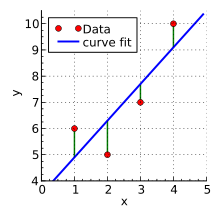

In [52]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [53]:
#Step 4: Using Numpy for a Univariate Linear Regression

In [57]:
#Numpy has a built in Least Square Method in its linear algebra library.

#We will start by setting up the X and Y arrays for numpy to take in. 
#An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, 
#and the second dimension is the attribute number. 
#In this case we have our value as the mean number of rooms per house, 
#and this is a single attribute so the second dimension of the array is just 1. 
#So we'll need to create a (506,1) shape array. 
#There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.


# Set up X as median room values
X = boston_df.RM

# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

In [58]:
#Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

#We know that a line has the equation:
#y=mx+b

#which we can rewrite using matrices:
#y=Ap

#where:
#A=[x 1]

#and

#p=[m 
#   b]

In [59]:
# Make the array shape to x, 1 for multiplication
X = np.array([[value,float(1)] for value in X ]) 
X = X.astype(np.float64)

In [60]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

C:\Users\jthak\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


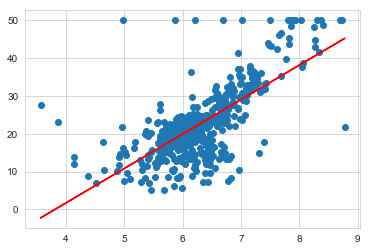

In [61]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [63]:
#Step 5: Getting the error

#We see that the resulting array has the total squared error. 
#For each element, it checks the the difference between the line and the true value (our original D value), 
#squares it, and returns the sum of all these. This was the summed D^2 value.

#It's probably easier to understand the root mean squared error, which is similar to the standard deviation. 
#In this case, to find the root mean square error we divide by the number of elements and then take the square root. 

In [64]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


C:\Users\jthak\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [67]:
#Understand the above result - https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

#Since the root mean square error (RMSE) corresponds approximately to the standard deviation,
#we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time (68-95-99.7 rule)

In [69]:
#Step 6: Using scikit learn to implement a multivariate regression

In [70]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [71]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [72]:
#The functions we will be using are:

#lreg.fit() which fits a linear model

#lreg.predict() which is used to predict Y using the linear model with estimated coefficients

#lreg.score() which returns the coefficient of determination (R^2). 
#A measure of how well observed outcomes are replicated by the model

In [73]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

In [74]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.46 


In [76]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [77]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [79]:
#Step 7: Using Training and Validation

In [80]:
#In a dataset a training set is implemented to build up a model, 
#while a validation set is used to validate the model built. 
#Data points in the training set are excluded from the validation set. 
#The correct way to pick out samples from your dataset to be part of either the training/validation(test) set is randomly.

#Scikit learn has a built in function specifically for this called train_test_split.

#The parameters passed are your X and Y, then optionally test_size parameter, 
#representing the proportion of the dataset to include in the test split

In [83]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [84]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((379L, 2L), (127L, 2L), (379L,), (127L,))


In [85]:
#Step 8: Predicting Prices

In [86]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [88]:
# Get the mean square error

print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 42.68
Fit a model X_train, and calculate MSE with X_test and Y_test: 47.41


In [89]:
#Our mean square error between our training and testing was pretty close

In [90]:
# Step 9 : Residual Plots

# Residual = Observed value − Predicted value

Text(0.5,1,'Residual Plots')

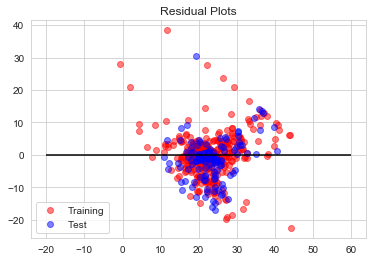

In [107]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='r',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='b',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-20,xmax=60)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

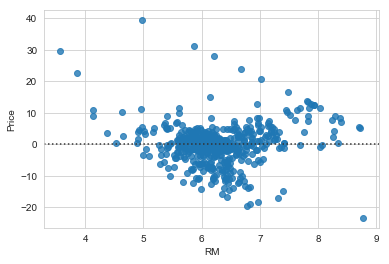

In [94]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)